In [1]:
### Importing Required Libaries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
### Importing Data set

df = pd.read_csv("kaggle_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# Get the information of the dataset
df.info()

In [3]:
### Get No of rows and columns

df.shape

(2000, 9)

In [4]:
### checking Duplicates
df.duplicated().sum()

1256

In [5]:
### Deleting Duplicates
df.drop_duplicates(inplace=True)

In [6]:
### Checking missing values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
### Get object types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
### Get Each Varaible unque Counts

df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [9]:
### Get the summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


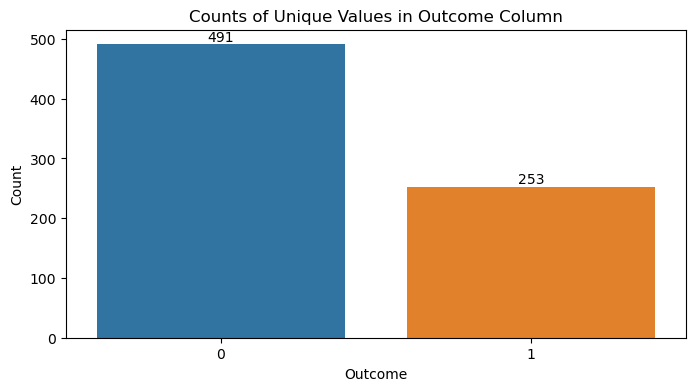

In [10]:
# Count unique values in the "outcome" column
outcome_counts = df['Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)

# Customize the plot
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Counts of Unique Values in Outcome Column')
# Annotate each bar with its count
for index, value in enumerate(outcome_counts.values):
    plt.text(index, value + 0.05, str(value), ha='center', va='bottom')
plt.show()

In [11]:
### Balancing Implanced of the target variable using SMOTE

from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])
df1 = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [12]:
### Check it applied
df1["Outcome"].value_counts()

1    491
0    491
Name: Outcome, dtype: int64

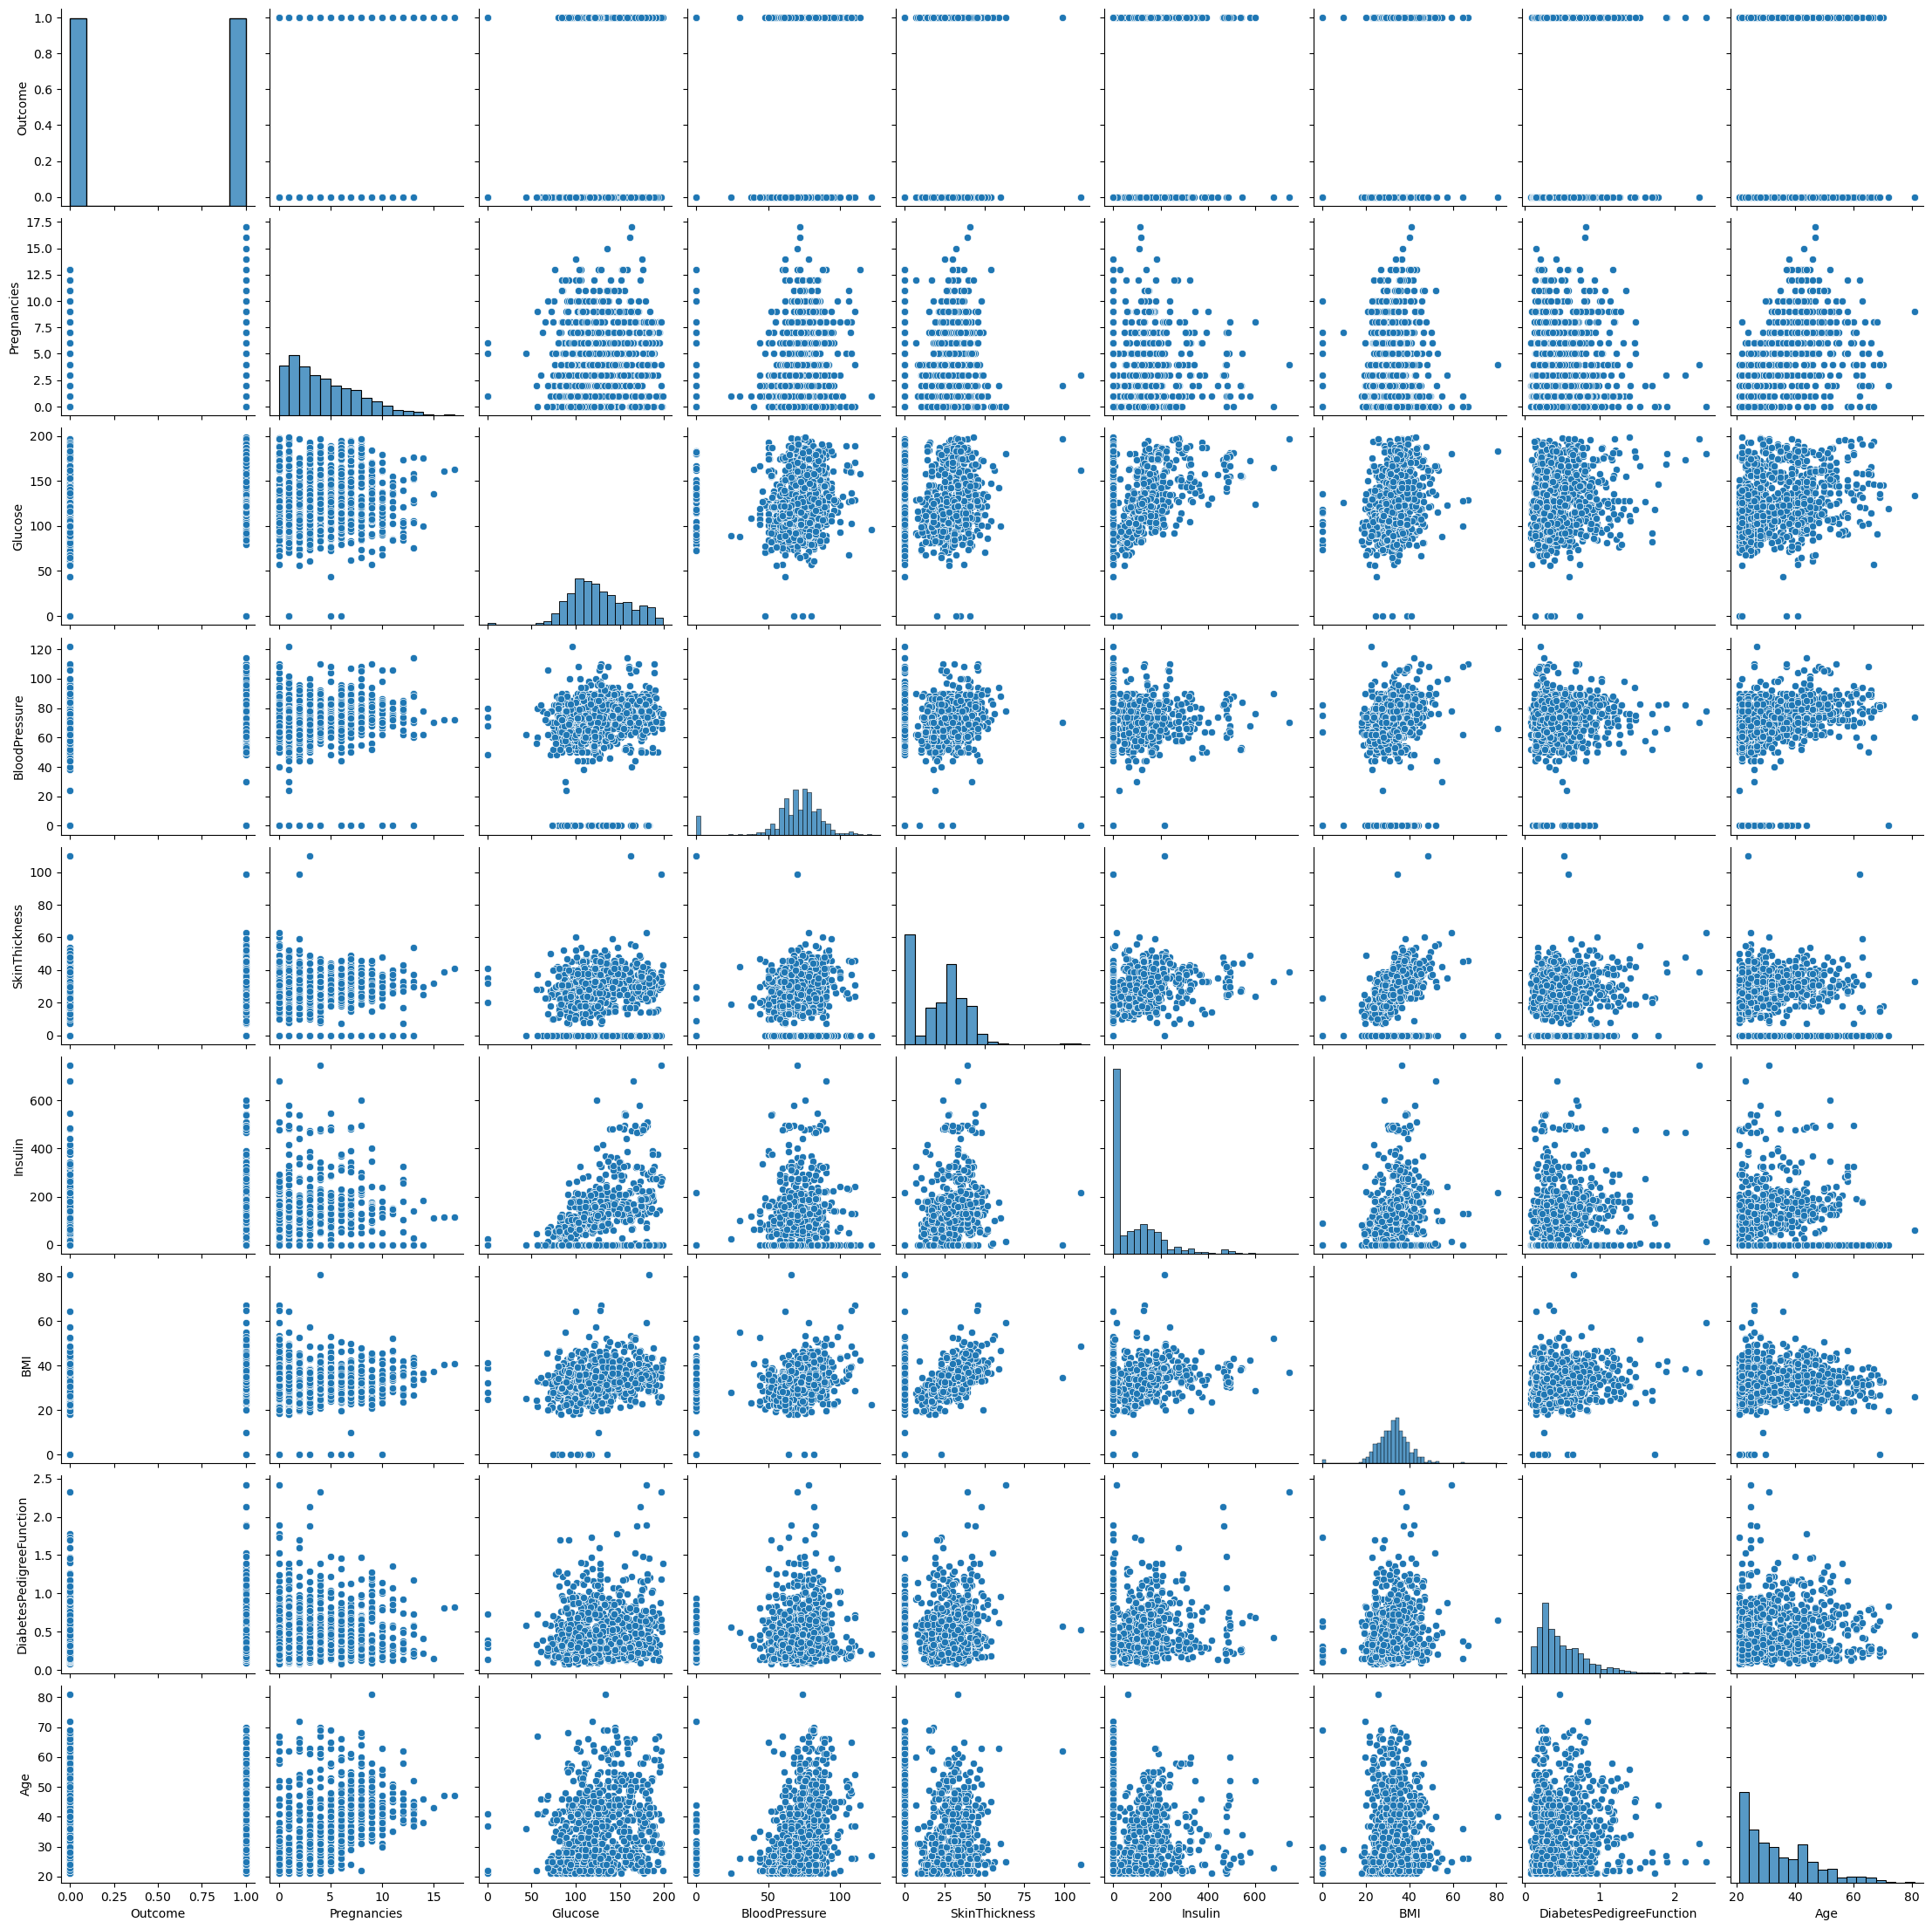

In [13]:
sns.pairplot(df1)

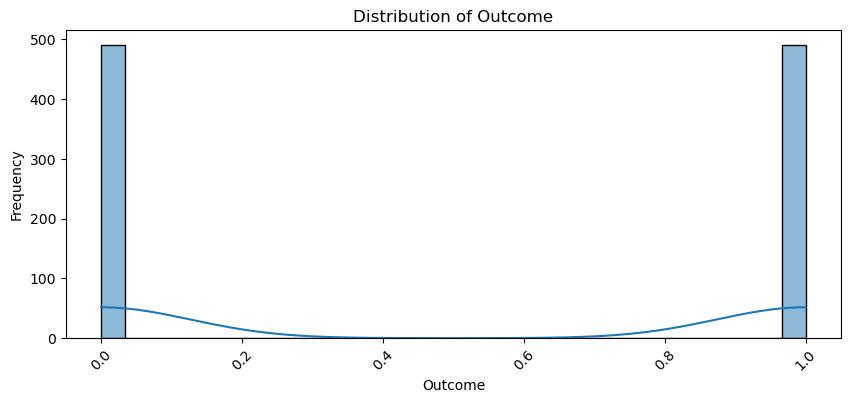

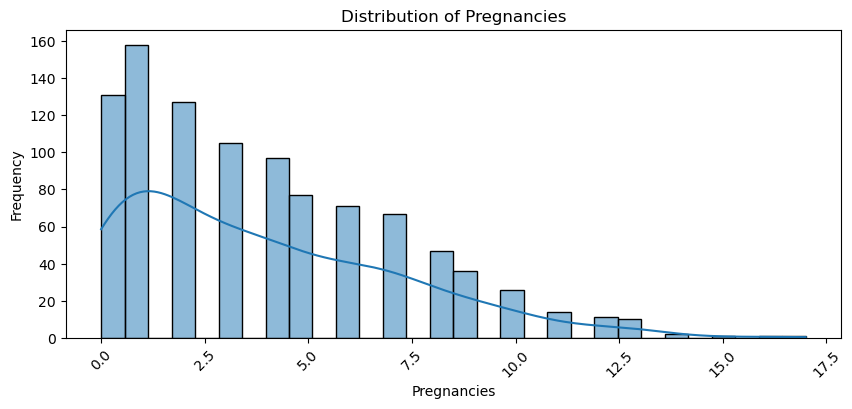

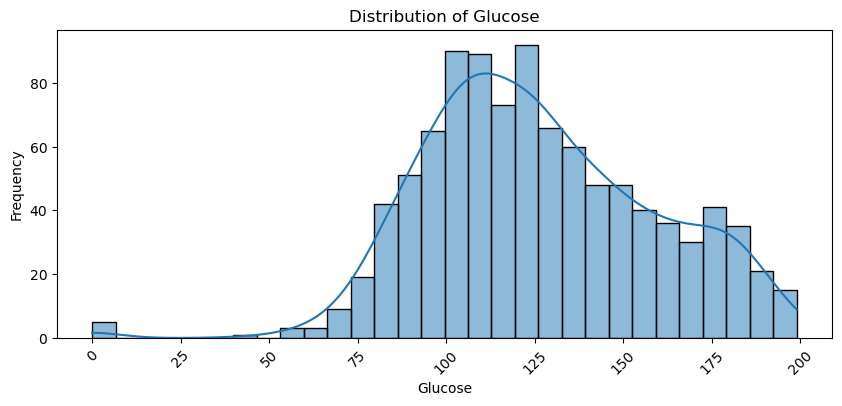

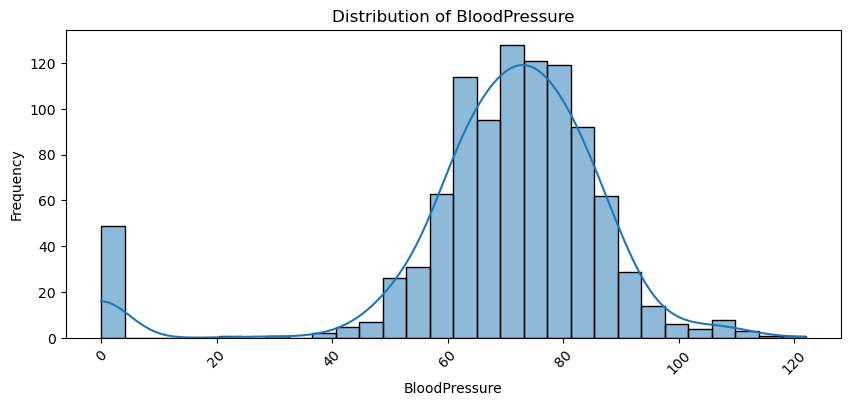

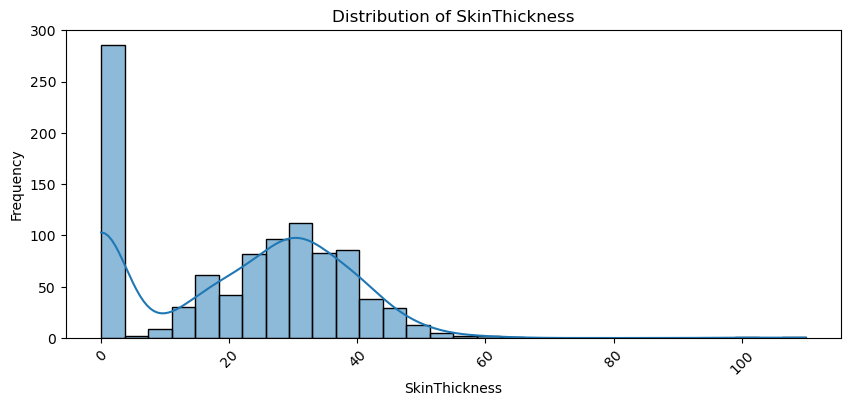

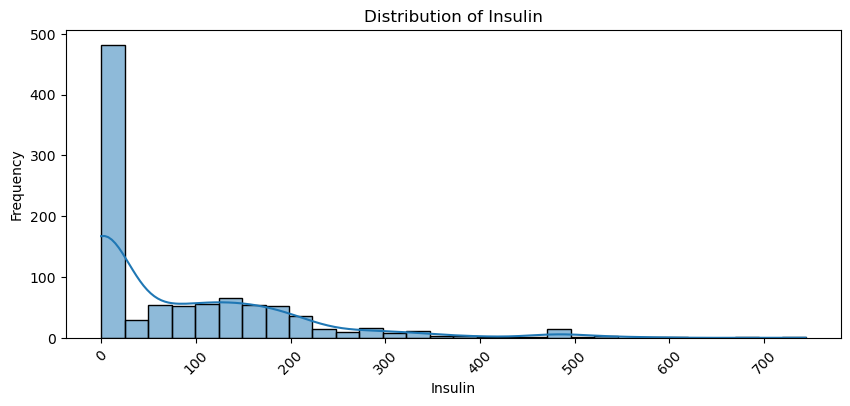

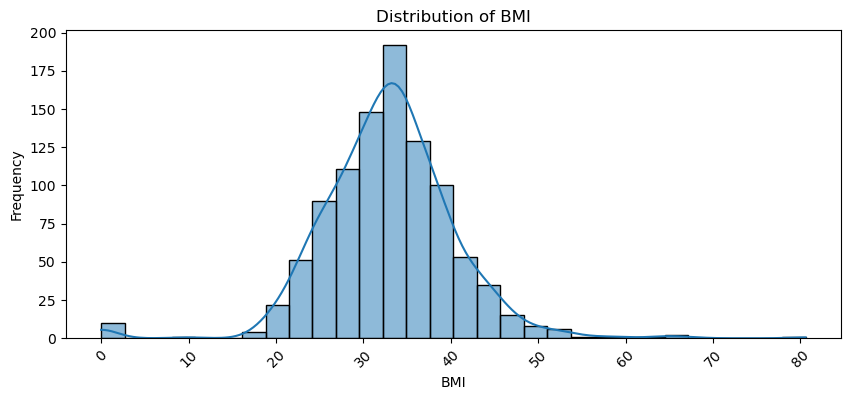

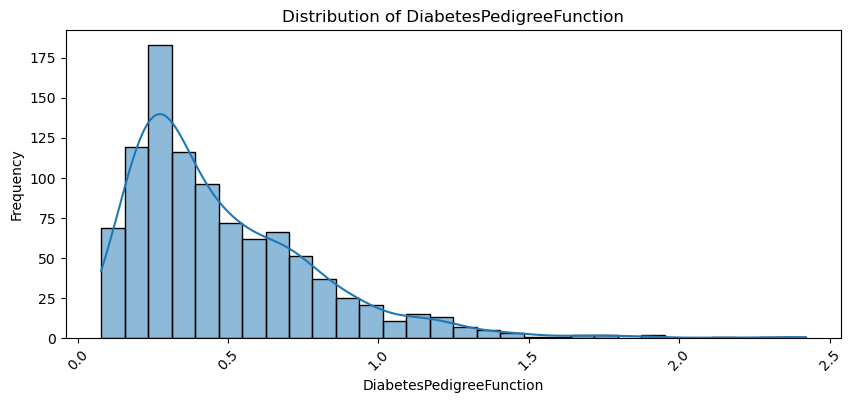

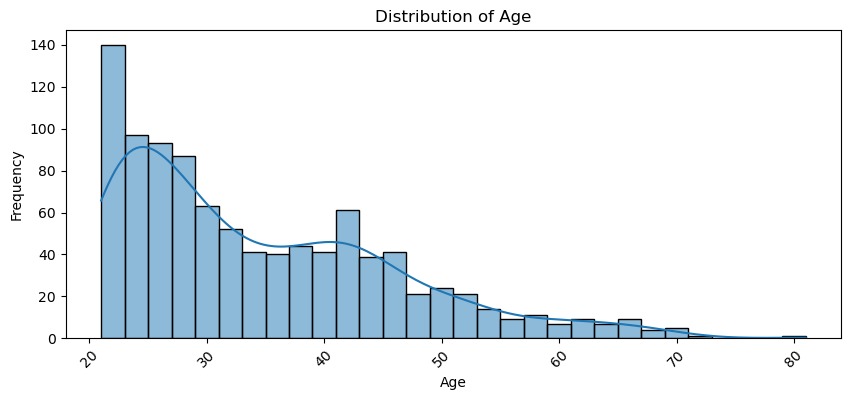

In [14]:
# Function to plot distributions
def plot_distributions(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(10, 4))
        if dataframe[column].dtype == 'object':
            # Categorical data
            sns.countplot(x=column, data=dataframe, palette='viridis')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
        else:
            # Numerical data
            sns.histplot(dataframe[column], kde=True, palette='viridis', bins=30)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.show()

# Plot distributions
plot_distributions(df1)


In [15]:
df1.columns

Index(['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [16]:
### Removing Outliers

from scipy import stats
import numpy as np

def remove_outliers_zscore(dataframe, column, threshold=3):
    z_scores = np.abs(stats.zscore(dataframe[column]))
    return dataframe[(z_scores < threshold)]

# Apply to each numerical column
for column in df1.select_dtypes(include=['float64', 'int64']).columns:
    df2 = remove_outliers_zscore(df1, column)

print(df2.describe())


          Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  975.000000   975.000000  975.000000     975.000000     975.000000   
mean     0.500513     3.911795  126.065641      69.321026      21.321026   
std      0.500256     3.279958   32.395049      19.645433      16.236715   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%      0.000000     1.000000  103.000000      64.000000       0.000000   
50%      1.000000     3.000000  122.000000      72.000000      25.000000   
75%      1.000000     6.000000  148.000000      80.000000      33.000000   
max      1.000000    17.000000  199.000000     122.000000     110.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  975.000000  975.000000                975.000000  975.000000  
mean    87.020513   32.932095                  0.485304   33.967179  
std    117.378071    7.592720                  0.318750   11.159887  
min      0.000000    0.000000      

In [17]:
df2.dtypes

Outcome                       int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [18]:
# Function to replace zeros with mean in selected columns
def replace_zeros_with_mean(df, columns):
    for col in columns:
        if col in df.columns:
            mean_value = df[col][df[col] != 0].mean()  # Calculate mean of non-zero values
            df[col] = df[col].replace(0, mean_value)   # Replace zeros with the mean
    return df
# Columns to check
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Apply function
df3 = replace_zeros_with_mean(df2, columns_to_replace)



C:\Users\Admin\AppData\Local\Temp\ipykernel_13824\444505870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(0, mean_value)   # Replace zeros with the mean


In [19]:
df3.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,2,138.0,62.000000,35.000000,166.689587,33.6,0.127,47
1,0,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23
2,1,0,145.0,72.910464,30.040462,166.689587,44.2,0.630,31
3,1,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24
4,0,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21


                           Outcome  Pregnancies   Glucose  BloodPressure  \
Outcome                   1.000000     0.214650  0.501496       0.194378   
Pregnancies               0.214650     1.000000  0.112284       0.198364   
Glucose                   0.501496     0.112284  1.000000       0.213281   
BloodPressure             0.194378     0.198364  0.213281       1.000000   
SkinThickness             0.208701     0.068019  0.187341       0.192389   
Insulin                   0.228183     0.072648  0.403755       0.069947   
BMI                       0.289591     0.009919  0.249947       0.269632   
DiabetesPedigreeFunction  0.171295    -0.010218  0.120186       0.045267   
Age                       0.287259     0.550237  0.251078       0.354256   

                          SkinThickness   Insulin       BMI  \
Outcome                        0.208701  0.228183  0.289591   
Pregnancies                    0.068019  0.072648  0.009919   
Glucose                        0.187341  0.403755 

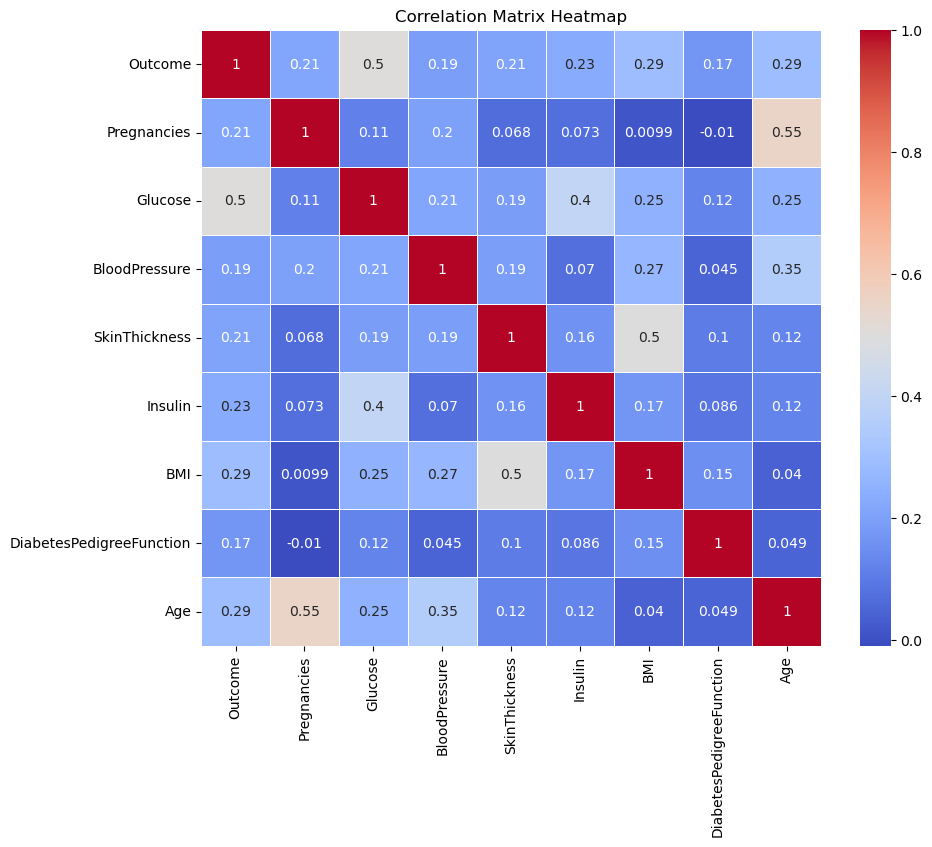

In [20]:
# Calculate the correlation matrix
correlation_matrix = df3.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
X= df3.drop(columns="Outcome",axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.000000,166.689587,33.6,0.127,47
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23
2,0,145.0,72.910464,30.040462,166.689587,44.2,0.630,31
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21


In [22]:
Y= df3["Outcome"]
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X= df3.drop(columns="Outcome",axis=1)
Y= df3["Outcome"]
x_train,x_test,y_train,y_test= train_test_split(X,Y,train_size=0.75,random_state=24,shuffle=True)

In [24]:
print(f'X_train shape {x_train.shape}') 
print(f'X_test shape {x_test.shape}')
print(f'Y_train shape {y_train.shape}')
print(f'Y_test shape {y_test.shape}')

X_train shape (731, 8)
X_test shape (244, 8)
Y_train shape (731,)
Y_test shape (244,)


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}




# Perform cross-validation and evaluate each model

In [26]:

for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5)  # 5-fold cross-validation
    print(f"Model: {name}")
    print(f"Cross-validated Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
    print("-" * 60)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model: Logistic Regression
Cross-validated Accuracy: 0.72 (+/- 0.04)
------------------------------------------------------------
Model: Decision Tree
Cross-validated Accuracy: 0.73 (+/- 0.10)
------------------------------------------------------------
Model: Random Forest
Cross-validated Accuracy: 0.81 (+/- 0.10)
------------------------------------------------------------
Model: Support Vector Machine
Cross-validated Accuracy: 0.75 (+/- 0.04)
------------------------------------------------------------
Model: k-Nearest Neighbors
Cross-validated Accuracy: 0.75 (+/- 0.07)
------------------------------------------------------------


Then I choosen best model for the taken data set is Random Forest Classifier

In [27]:

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred)  # Get classification report
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       113
           1       0.81      0.76      0.78       131

    accuracy                           0.77       244
   macro avg       0.77      0.78      0.77       244
weighted avg       0.78      0.77      0.77       244

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       113
           1       0.85      0.73      0.79       131

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.80      0.79      0.79       244

------------------------------------------------------------


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       113
           1       0.81      0.83      0.82       131

    accuracy                           0.80       244
   macro avg       0.80      0.80      0.80       244
weighted avg       0.80      0.80      0.80       244

------------------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.77       113
           1       0.82      0.73      0.77       131

    accuracy                           0.77       244
   macro avg       0.77      0.77      0.77       244
weighted avg       0.78      0.77      0.77       244

------------------------------------------------------------
Model: k-Nearest Neighbors
Accuracy: 0.77
Classification Report:
               precision    re

### Hyper Parameter Tuning

In [28]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [4, 6, 8, 10, 12],
#     'criterion': ['gini', 'entropy']
# }



# # Initialize GridSearchCV
# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(x_train, y_train)

# # Best parameters found by GridSearchCV
# print("Best parameters found: ", grid_search.best_params_)

# # Best estimator
# best_rf = grid_search.best_estimator_

# # Predict on the test set
# y_pred = best_rf.predict(x_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy:.2f}")
# print("Classification Report:\n", report)

In [29]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
747,8,160.0,108.0,30.040462,166.689587,39.628842,0.195447,48
469,6,154.0,78.0,41.000000,140.000000,46.100000,0.571000,27
317,3,182.0,74.0,30.040462,166.689587,30.500000,0.345000,29
221,2,158.0,90.0,30.040462,166.689587,31.600000,0.805000,66
321,3,112.0,74.0,30.000000,166.689587,31.600000,0.197000,25


In [30]:
rfc = RandomForestClassifier()
final_model = rfc.fit(x_train,y_train) 
y_pred = final_model.predict(x_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
report = classification_report(y_test, y_pred)  # Get classification report
print(f"Model: RandomForestClassifier")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("-" * 60)   


Model: RandomForestClassifier
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       113
           1       0.80      0.83      0.82       131

    accuracy                           0.80       244
   macro avg       0.80      0.80      0.80       244
weighted avg       0.80      0.80      0.80       244

------------------------------------------------------------


In [31]:
pr= 3
gl= 100
bl= 70
sk= 32
ins= 165
bm= 30
df= 0.5
age= 40

new_data = {
    'Pregnancies': [pr],
    'Glucose': [gl],
    'BloodPressure': [bl],
    'SkinThickness': [sk],
    'Insulin': [ins],
    'BMI': [bm],
    'DiabetesPedigreeFunction': [df],
    'Age': [age],
}

In [32]:
# Create DataFrame for new values
new_df = pd.DataFrame(new_data)
feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

In [33]:

X_new = new_df[feature_cols]



y_pred_new1 = final_model.predict(X_new)


if y_pred_new1 == 0:
    print("Luckily Patient has not Diabetes")
else:
    ("Unfortunately Patient has Diabetes")


Luckily Patient has not Diabetes


In [34]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(final_model, file)